In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from skimage.io import imread
import matplotlib
from sklearn.metrics import mean_squared_error
import skimage
%matplotlib inline

In [2]:
image = imread('parrots.jpg')

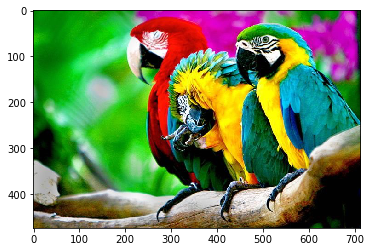

In [3]:
import pylab
pylab.imshow(image)

In [4]:
image = skimage.img_as_float(image)
w = image[:,:,0].shape[0]
h = image[:,:,0].shape[1] 
size = w * h
obj_feaut = image.reshape((size, 3))

In [5]:
clusters_count = 11
kmeans = KMeans(n_clusters = clusters_count, init='k-means++', random_state=241)
kmeans.fit(obj_feaut)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f133b5b1c18>]], dtype=object)

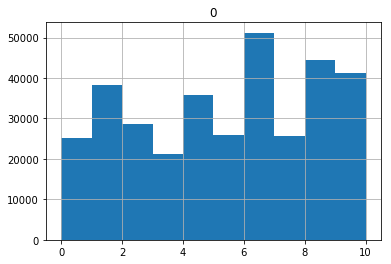

In [6]:
pd.DataFrame(kmeans.labels_).hist()

In [7]:
clusters = np.vstack([kmeans.labels_, obj_feaut[:,0], obj_feaut[:,1], obj_feaut[:,2]])
clusters = clusters.transpose()
clusters.shape

(337962, 4)

In [8]:
fr_clusters = pd.DataFrame(clusters, columns=['num', 'r', 'g', 'b'])
fr_clusters.head()

num         r         g         b
0  1.0  0.011765  0.490196  0.015686
1  1.0  0.011765  0.490196  0.015686
2  1.0  0.007843  0.494118  0.007843
3  1.0  0.007843  0.494118  0.007843
4  1.0  0.007843  0.501961  0.011765

In [ ]:
means = []
medians = []
for i in range(0, clusters_count):
    cluster = fr_clusters[fr_clusters.num == i]
    means.append([cluster.mean()[1], cluster.mean()[2], cluster.mean()[3]])
    medians.append([cluster.median()[1], cluster.median()[2], cluster.median()[3]])

In [ ]:
means_clust = fr_clusters.copy()
medians_clust = fr_clusters.copy()
for i in range(0, size):
    means_clust.r[i], means_clust.g[i], means_clust.b[i] = means[int(fr_clusters.num[i])]
    medians_clust.r[i], medians_clust.g[i], medians_clust.b[i] = medians[int(fr_clusters.num[i])]

In [ ]:
def psnr(x, y):
    return 10.0 * np.log10(1.0 / mean_squared_error(x, y))

In [ ]:
print(psnr(obj_feaut, means_clust.drop('num', axis=1).values))
print(psnr(obj_feaut, medians_clust.drop('num', axis=1).values))

clusters_count = 8:

psnr_means: 18.4828445428

psnr_medians: 18.1873684291